In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# импортируем библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

In [4]:
df_train = pd.read_csv('hotels_train.csv') # датасет для обучения
df_test = pd.read_csv('hotels_test.csv') # датасет для предсказания
sample_submission = pd.read_csv('submission.csv') # самбмишн

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [6]:
df_train.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               128935 non-null  object 
 1   additional_number_of_scoring                128935 non-null  int64  
 2   review_date                                 128935 non-null  object 
 3   average_score                               128935 non-null  float64
 4   hotel_name                                  128935 non-null  object 
 5   reviewer_nationality                        128935 non-null  object 
 6   negative_review                             128935 non-null  object 
 7   review_total_negative_word_counts           128935 non-null  int64  
 8   total_number_of_reviews                     128935 non-null  int64  
 9   positive_review                             128935 non-null  object 
 

In [8]:
df_test.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443


In [9]:
sample_submission.head(2)

,reviewer_score,id
0,1,488440
1,10,274649


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   reviewer_score  128935 non-null  int64
 1   id              128935 non-null  int64
dtypes: int64(2)
memory usage: 2.0 MB


In [11]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['reviewer_score'] = 0 # в тесте у нас нет значения reviewer_score, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

C:\Users\Asus-PC\AppData\Local\Temp\ipykernel_13344\447817491.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

In [13]:
!pip3 install nltk

You should consider upgrading via the 'C:\Users\Asus-PC\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [14]:
# создаем новые признаки на основе 'negative_review' и 'positive_review'
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import time
nltk.downloader.download('vader_lexicon')

sent_analyzer = SentimentIntensityAnalyzer()

data['neg_neg'] = data['negative_review'].apply(lambda x: sent_analyzer.polarity_scores(x)['neg'])
data['neg_neu'] = data['negative_review'].apply(lambda x: sent_analyzer.polarity_scores(x)['neu'])
data['neg_pos'] = data['negative_review'].apply(lambda x: sent_analyzer.polarity_scores(x)['pos'])
data['neg_compound'] = data['negative_review'].apply(lambda x: sent_analyzer.polarity_scores(x)['compound'])

data['pos_neg'] = data['positive_review'].apply(lambda x: sent_analyzer.polarity_scores(x)['neg'])
data['pos_neu'] = data['positive_review'].apply(lambda x: sent_analyzer.polarity_scores(x)['neu'])
data['pos_pos'] = data['positive_review'].apply(lambda x: sent_analyzer.polarity_scores(x)['pos'])
data['pos_compound'] = data['positive_review'].apply(lambda x: sent_analyzer.polarity_scores(x)['compound'])

[nltk_data] Downloading package vader_lexicon to C:\Users\Asus-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 26 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

In [16]:
# создаем новый признак 'nights'(количество ночей, проведенных в отеле) на основе признака 'tags'
regex_nights = '(\d+) night'
data['nights'] = data['tags'].str.findall(regex_nights).str.get(0)

# заполняем пропуски в признаке 'nights' модальным значением, переводим признак в формат целого числа
nights_mode = int(data['nights'].mode())
data['nights'] = data['nights'].fillna(value = nights_mode)
data['nights'] = data['nights'].astype(int)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 27 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

In [18]:
# создаем новый признак 'goals'(цель путешествия) на основе признака 'tags'
regex_goal = '(\w+) trip'
data['goal'] = data['tags'].str.findall(regex_goal).str.get(0)

# заполняем пропуски в признаке 'goal' на 'unknown'
data['goal'] = data['goal'].fillna('uknown')

# кодируем номинальный категориальный признак 'goal'(принимающий 3 значения) с помощью OneHot Encoding
import category_encoders as ce
one_hot_encoder_goal = ce.OneHotEncoder()
data_goal = one_hot_encoder_goal.fit_transform(data['goal'])
data = pd.concat([data, data_goal], axis = 1)

# переименование столбцов
data = data.rename(columns = {
    'goal_1': 'Leisure',
    'goal_2': 'Business',
    'goal_3': 'Unknown'})

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 31 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

In [20]:
# переводим признак 'days_since_review' из строкового в числовой
regex_days = '(\d*)'
data['days_since_review'] = data['days_since_review'].str.findall(regex_days).str.get(0).astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 31 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

In [21]:
# создаем новый признак 'hotel_country'(страна отеля) на основе признака 'hotel_address'
regex_country = '\s(\w*)$'
data['hotel_country'] = data['hotel_address'].str.findall(regex_country).str.get(0)

# кодируем номинальный признак 'hotel_country'(принимающий 6 значений) с помощью get_dummies:
data = pd.get_dummies(data, columns = ['hotel_country'])

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 37 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

In [23]:
# переводим признак 'review_date' в формат datetime
data['review_date'] = pd.to_datetime(data['review_date'])

# создаем новые признаки 'month' и 'dayofweek' на основе признака 'review_date'
data['month'] = data['review_date'].dt.month
data['dayofweek'] = data['review_date'].dt.dayofweek

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 39 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               515738 non-null  object        
 1   additional_number_of_scoring                515738 non-null  int64         
 2   review_date                                 515738 non-null  datetime64[ns]
 3   average_score                               515738 non-null  float64       
 4   hotel_name                                  515738 non-null  object        
 5   reviewer_nationality                        515738 non-null  object        
 6   negative_review                             515738 non-null  object        
 7   review_total_negative_word_counts           515738 non-null  int64         
 8   total_number_of_reviews                     515738 non-null  int64        

In [25]:
# кодируем номинальный признак 'reviewer_nationality'(принимающий 225 значений) с помощью Binary Encoding
encoder_nationality = ce.BinaryEncoder()
data_nationality = encoder_nationality.fit_transform(data['reviewer_nationality'])
data = pd.concat([data, data_nationality], axis = 1)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 47 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               515738 non-null  object        
 1   additional_number_of_scoring                515738 non-null  int64         
 2   review_date                                 515738 non-null  datetime64[ns]
 3   average_score                               515738 non-null  float64       
 4   hotel_name                                  515738 non-null  object        
 5   reviewer_nationality                        515738 non-null  object        
 6   negative_review                             515738 non-null  object        
 7   review_total_negative_word_counts           515738 non-null  int64         
 8   total_number_of_reviews                     515738 non-null  int64        

In [27]:
# заменяем пропуски в признаках 'lat' и 'lng' на модальные значения
value_lat_lng = {
    'lat': data['lat'].mode()[0],
    'lng': data['lng'].mode()[0]
}
data = data.fillna(value_lat_lng)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 47 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               515738 non-null  object        
 1   additional_number_of_scoring                515738 non-null  int64         
 2   review_date                                 515738 non-null  datetime64[ns]
 3   average_score                               515738 non-null  float64       
 4   hotel_name                                  515738 non-null  object        
 5   reviewer_nationality                        515738 non-null  object        
 6   negative_review                             515738 non-null  object        
 7   review_total_negative_word_counts           515738 non-null  int64         
 8   total_number_of_reviews                     515738 non-null  int64        

In [29]:
# очищаем датасет от нечисловых признаков
cols_to_remove = ['hotel_address',
 'review_date',
 'hotel_name',
 'reviewer_nationality',
 'negative_review',
 'positive_review',
 'tags',
 'goal']

data = data.drop(cols_to_remove, axis = 1)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 39 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                515738 non-null  int64  
 1   average_score                               515738 non-null  float64
 2   review_total_negative_word_counts           515738 non-null  int64  
 3   total_number_of_reviews                     515738 non-null  int64  
 4   review_total_positive_word_counts           515738 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  515738 non-null  int64  
 6   days_since_review                           515738 non-null  int32  
 7   lat                                         515738 non-null  float64
 8   lng                                         515738 non-null  float64
 9   sample                                      515738 non-null  int64  
 

In [31]:
# выбираем признаки для нормализации
cols_for_norm = ['additional_number_of_scoring', 'average_score','review_total_negative_word_counts', 
                 'total_number_of_reviews', 'review_total_positive_word_counts', 
                 'total_number_of_reviews_reviewer_has_given']

# получаем преобразованные признаки с помощью RobustScaler
from sklearn import preprocessing
r_scaler = preprocessing.RobustScaler()
df_r = r_scaler.fit_transform(data[['additional_number_of_scoring', 'average_score',
                                    'review_total_negative_word_counts', 
                                    'total_number_of_reviews', 'review_total_positive_word_counts',
                                    'total_number_of_reviews_reviewer_has_given']])
df_r = pd.DataFrame(df_r, columns=cols_for_norm)

df_r

# заменяем признаки на преобразованные
for col in cols_for_norm:
    data[col] = df_r[col]
data.head()

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,days_since_review,lat,lng,sample,...,month,dayofweek,reviewer_nationality_0,reviewer_nationality_1,reviewer_nationality_2,reviewer_nationality_3,reviewer_nationality_4,reviewer_nationality_5,reviewer_nationality_6,reviewer_nationality_7
0,1.146640,-0.428571,2.047619,5.928222,3.000000,-0.285714,13,45.533137,9.171102,0,...,7,4,0,0,0,0,0,0,0,1
1,0.551935,0.285714,0.047619,1.176183,-0.647059,0.571429,234,52.385649,4.834443,0,...,12,0,0,0,0,0,0,0,1,0
2,-0.600815,-0.142857,-0.285714,-0.727162,-0.352941,1.714286,616,41.393192,2.161520,0,...,11,3,0,0,0,0,0,0,1,1
3,-0.203666,1.000000,-0.428571,-0.241028,0.941176,0.857143,656,45.479888,9.196298,0,...,10,5,0,0,0,0,0,1,0,0
4,1.004073,1.000000,-0.428571,1.041191,-0.235294,-0.142857,444,52.370545,4.888644,0,...,5,0,0,0,0,0,0,0,0,1


<AxesSubplot:>

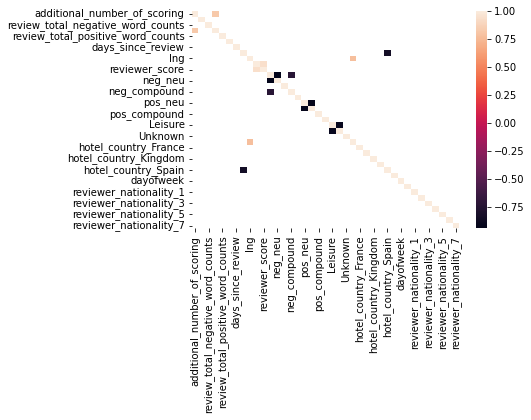

In [32]:
#ищем мультиколлинеарные признаки
corr = data.corr()
corr = corr[corr.abs()>=0.7]
sns.heatmap(corr)

<AxesSubplot:>

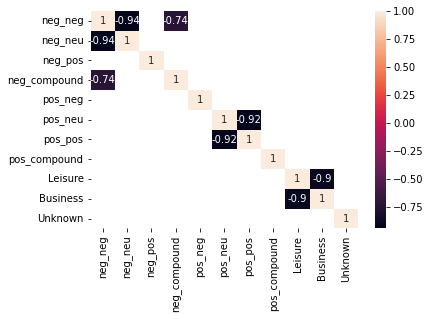

In [33]:
#ищем мультиколлинеарные признаки - детализация 1
corr1 = data[['neg_neg', 'neg_neu', 'neg_pos', 'neg_compound', 'pos_neg', 'pos_neu',
       'pos_pos', 'pos_compound', 'Leisure', 'Business', 'Unknown']].corr()
corr1 = corr1[corr1.abs()>=0.7]
sns.heatmap(corr1, annot=True)

<AxesSubplot:>

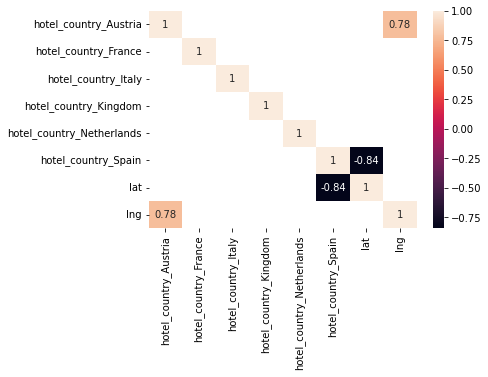

In [34]:
#ищем мультиколлинеарные признаки - детализация 2
corr2 = data[['hotel_country_Austria', 'hotel_country_France', 'hotel_country_Italy',
       'hotel_country_Kingdom', 'hotel_country_Netherlands',
       'hotel_country_Spain', 'lat', 'lng']].corr()
corr2 = corr2[corr2.abs()>=0.7]
sns.heatmap(corr2, annot=True)

<AxesSubplot:>

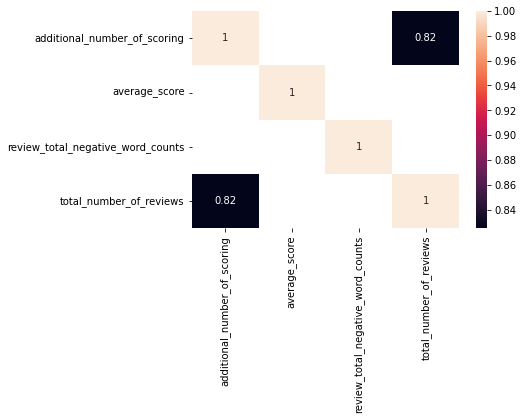

In [35]:
#ищем мультиколлинеарные признаки - детализация 3
corr3 = data[['additional_number_of_scoring',
       'average_score', 'review_total_negative_word_counts',
       'total_number_of_reviews']].corr()
corr3 = corr3[corr3.abs()>=0.7]
sns.heatmap(corr3, annot=True)

In [36]:
#удаляем мультиколлинеарные признаки
multicol_features = ['neg_neg', 'pos_pos', 'Leisure', 'lat', 'lng', 'additional_number_of_scoring']
data = data.drop(multicol_features, axis = 1)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 33 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   average_score                               515738 non-null  float64
 1   review_total_negative_word_counts           515738 non-null  float64
 2   total_number_of_reviews                     515738 non-null  float64
 3   review_total_positive_word_counts           515738 non-null  float64
 4   total_number_of_reviews_reviewer_has_given  515738 non-null  float64
 5   days_since_review                           515738 non-null  int32  
 6   sample                                      515738 non-null  int64  
 7   reviewer_score                              515738 non-null  float64
 8   neg_neu                                     515738 non-null  float64
 9   neg_pos                                     515738 non-null  float64
 

In [38]:
# Теперь выделим тестовую часть
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample'], axis=1)

y = train_data.reviewer_score.values            # наш таргет
X = train_data.drop(['reviewer_score'], axis=1)

In [39]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [40]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((128935, 32), (386803, 32), (386803, 31), (309442, 31), (77361, 31))

In [41]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [42]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [43]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.6min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    4.2s finished


In [44]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAPE:', metrics.mean_absolute_error(y_test, y_pred))

MAPE: 0.8780589577866535


In [45]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.12517724202288277


<AxesSubplot:>

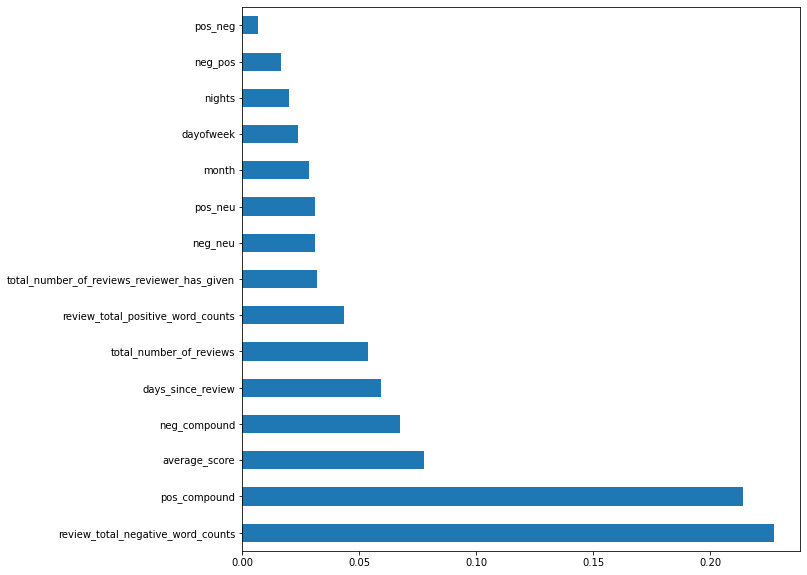

In [46]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [47]:
test_data.sample(10)

,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,days_since_review,reviewer_score,neg_neu,neg_pos,neg_compound,...,month,dayofweek,reviewer_nationality_0,reviewer_nationality_1,reviewer_nationality_2,reviewer_nationality_3,reviewer_nationality_4,reviewer_nationality_5,reviewer_nationality_6,reviewer_nationality_7
65527,0.428571,0.857143,-0.241028,0.529412,-0.285714,224,0.0,0.906,0.000,-0.3818,...,12,3,0,0,0,0,0,0,0,1
50211,1.000000,1.095238,-0.665987,0.647059,0.857143,107,0.0,0.852,0.148,0.5423,...,4,1,0,0,0,0,0,0,0,1
100,0.000000,0.761905,-0.019984,-0.470588,-0.142857,581,0.0,0.804,0.000,-0.6261,...,12,3,0,0,0,0,0,0,0,1
42874,-0.714286,-0.238095,1.899674,1.176471,0.000000,2,0.0,1.000,0.000,0.0000,...,8,1,0,0,0,0,0,0,0,1
111515,0.571429,0.380952,-0.263051,-0.235294,0.142857,22,0.0,0.747,0.103,-0.2023,...,7,2,0,0,0,0,0,0,0,1
61096,-0.428571,0.190476,-0.231240,-0.529412,-0.285714,250,0.0,0.675,0.000,-0.5875,...,11,5,0,1,1,0,0,1,1,1
62294,-2.000000,-0.428571,-0.029772,0.000000,-0.285714,487,0.0,0.000,0.000,-0.7096,...,4,6,0,0,0,0,1,1,1,0
100260,1.285714,0.285714,0.075449,0.411765,-0.285714,77,0.0,0.836,0.164,0.3291,...,5,3,0,0,0,0,0,0,0,1
119892,-0.142857,2.714286,0.544454,-0.176471,1.857143,423,0.0,0.775,0.035,-0.8845,...,6,0,0,0,0,0,0,0,0,1
80036,-0.714286,-0.428571,-0.039560,0.235294,0.714286,659,0.0,0.000,0.000,-0.7096,...,10,2,0,0,0,0,0,0,0,1


In [48]:
test_data = test_data.drop(['reviewer_score'], axis=1)

In [49]:
sample_submission

,reviewer_score,id
0,1,488440
1,10,274649
2,3,374688
3,10,404352
4,9,451596
...,...,...
128930,7,495812
128931,1,315577
128932,3,511968
128933,6,303386


In [50]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    6.4s finished


In [51]:
predict_submission

array([8.695, 7.355, 8.636, ..., 8.367, 9.468, 7.016])

In [52]:
list(sample_submission)

['reviewer_score', 'id']

In [53]:
sample_submission['reviewer_score'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,reviewer_score,id
0,8.695,488440
1,7.355,274649
2,8.636,374688
3,9.729,404352
4,9.480,451596
5,9.120,302161
6,8.103,317079
7,7.519,13963
8,8.367,159785
9,7.703,195089
